#### Batch Normalization 

https://arxiv.org/pdf/1502.03167

In [12]:
import torch.nn as nn
import torch

In [13]:
# BN 1d


B, C = 2 , 3  
x1 = torch.randn((B, C))

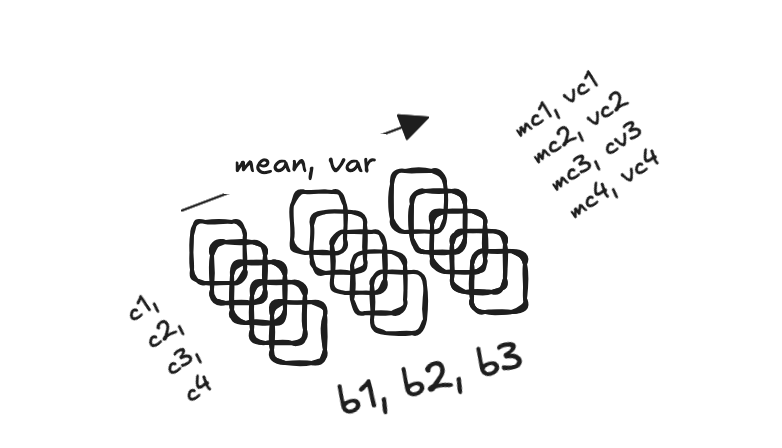

Calculate Mean, Variance for Ci of all batch values i -> 0, 1, 2, 3

In [18]:

#mean, var calculation and dim shape:  b, c -> 1, c

m = torch.mean(x1, dim=0, keepdim=True)
sd = torch.sqrt(torch.var(x1, dim=0, unbiased=False,  keepdim=True)+ 1e-5)
x1_norm = (x1 - m)/sd
print(m.shape, sd.shape)
print(x1_norm)

torch.Size([1, 3]) torch.Size([1, 3])
tensor([[-0.9706,  0.9900,  1.0000],
        [ 0.9706, -0.9900, -1.0000]])


In [15]:
bn = nn.BatchNorm1d(C, momentum=None, affine=True, track_running_stats=False)
x1_norm = bn(x1)
x1_norm

tensor([[-0.9706,  0.9900,  1.0000],
        [ 0.9706, -0.9900, -1.0000]], grad_fn=<NativeBatchNormBackward0>)

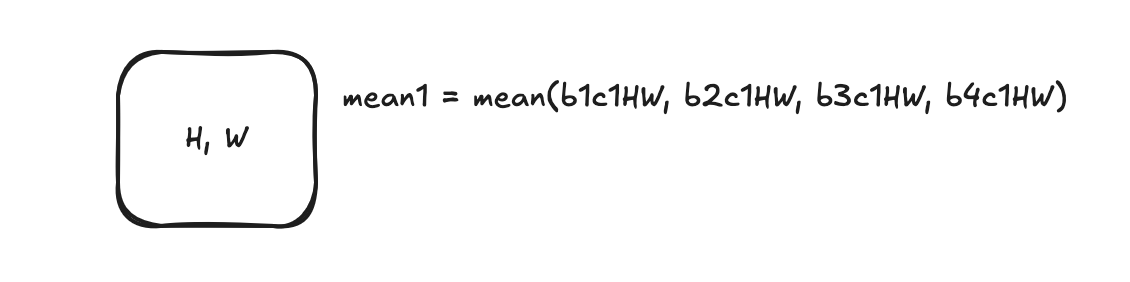

BN2d : b, c, w, h, -> 1, c, 1, 1 \
Calculate mean and SD across all channels / features (W, H, B)


In [20]:
B, H, W, C = 2, 4, 4, 3  
x2 = torch.randn((B, C, W, H))


In [26]:
bn2d = nn.BatchNorm2d(C, momentum=None, affine=True, track_running_stats=False)
x2_norm = bn2d(x2)
x2_norm.shape

torch.Size([2, 3, 4, 4])

In [27]:
x2_norm

tensor([[[[ 0.6273,  0.0971,  0.3991,  1.5433],
          [ 0.1313, -0.0951, -0.8122, -1.8281],
          [ 0.8405,  0.1010, -2.2821,  0.1025],
          [ 0.8011, -0.0158, -0.7615,  2.1812]],

         [[-0.0252,  0.8843, -1.0539,  0.9399],
          [-0.5235, -0.9449,  2.0718, -0.1743],
          [ 1.6739, -0.4822,  0.3902, -2.4829],
          [-0.5566, -1.2370, -1.5290,  1.4967]],

         [[-1.0411, -0.4047,  0.6132,  1.1547],
          [ 0.2498,  1.7823,  0.7466,  0.1864],
          [ 0.6923,  0.8044, -0.6005, -1.4519],
          [-0.2612,  0.5756, -0.3061,  0.2466]]],


        [[[-0.5696, -1.2316,  0.5131,  0.2098],
          [-0.8382,  2.1806, -0.2408, -0.7218],
          [-0.1619, -0.9330,  1.3019, -1.1377],
          [ 0.6781,  0.1715,  0.3854, -0.6355]],

         [[-0.8483, -0.1345,  0.4365, -0.6733],
          [ 1.4165, -0.8835, -0.6212, -0.5041],
          [ 0.9828,  1.0276,  0.4921, -0.1752],
          [-0.1453, -0.0918,  0.5397,  0.7348]],

         [[-1.1310,  0.9968,

In [28]:
#mean, var calculation and dim shape:  b, c, w, h -> 1, c, 1, 1

m = torch.mean(x2, dim=(0,2,3), keepdim=True)
sd = torch.sqrt(torch.var(x2, dim=(0,2,3), unbiased=False,  keepdim=True)+ 1e-5)
x2_norm = (x2 - m)/sd
print(m.shape, sd.shape)
print(x2_norm.shape)

torch.Size([1, 3, 1, 1]) torch.Size([1, 3, 1, 1])
torch.Size([2, 3, 4, 4])


In [29]:
x2_norm

tensor([[[[ 0.6273,  0.0971,  0.3991,  1.5433],
          [ 0.1313, -0.0951, -0.8122, -1.8281],
          [ 0.8405,  0.1010, -2.2821,  0.1025],
          [ 0.8011, -0.0158, -0.7615,  2.1812]],

         [[-0.0252,  0.8843, -1.0539,  0.9399],
          [-0.5235, -0.9449,  2.0718, -0.1743],
          [ 1.6739, -0.4822,  0.3902, -2.4829],
          [-0.5566, -1.2370, -1.5290,  1.4967]],

         [[-1.0411, -0.4047,  0.6132,  1.1547],
          [ 0.2498,  1.7823,  0.7466,  0.1864],
          [ 0.6923,  0.8044, -0.6005, -1.4519],
          [-0.2612,  0.5756, -0.3061,  0.2466]]],


        [[[-0.5696, -1.2316,  0.5131,  0.2098],
          [-0.8382,  2.1806, -0.2408, -0.7218],
          [-0.1619, -0.9330,  1.3019, -1.1377],
          [ 0.6781,  0.1715,  0.3854, -0.6355]],

         [[-0.8483, -0.1345,  0.4365, -0.6733],
          [ 1.4165, -0.8835, -0.6212, -0.5041],
          [ 0.9828,  1.0276,  0.4921, -0.1752],
          [-0.1453, -0.0918,  0.5397,  0.7348]],

         [[-1.1310,  0.9968,

Custom BN

In [97]:
class BatchNorm(nn.Module):
    def __init__(self, num_features, momentum=0.1, affine=True, track_running_stats=True):
        super().__init__()
        
        self.affine = affine
        self.track_running_stats = track_running_stats
        self.eps = 1e-5
        self.num_features=num_features
        self.momentum = momentum
        
        if affine:
            self.gamma = nn.Parameter(torch.ones(num_features))
            self.beta = nn.Parameter(torch.zeros(num_features))
        else:
            self.beta, self.gamma = None, None
        
        if track_running_stats:
            self.register_buffer("running_mean", torch.zeros(num_features))
            self.register_buffer("running_var", torch.ones(num_features))
            
        else :
            self.running_mean = torch.tensor(0)
            self.running_var =  torch.tensor(1)


    
    def forward(self, x):
        
        if len(x.shape) == 2:
            dim = 0
            gamma = self.gamma[None, :]
            beta = self.beta[None, :]
           
        elif len(x.shape) == 4 and x.shape[1] == self.num_features:
            dim = (0, 2, 3)
            gamma = self.gamma[None, :, None, None]
            beta = self.beta[None, :, None, None]
        else:
            raise Exception(f"expected len of input dim be 2 or 4 but got {x.shape},\
            num_features be at 2 dim")
        
        
        if self.training :
            mean = x.mean(dim=dim, keepdim=True)
            var = x.var(dim=dim, unbiased=False, keepdim=True)

            # Update running stats (for inference)
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * mean.detach()
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * var.detach()
        else:
            mean = self.running_mean
            var = self.running_var
        
        x_norm  = (x - mean)/torch.sqrt(var + self.eps) 
        
        if self.affine:
            x_norm = gamma * x_norm + beta
            
        
        return x_norm

In [98]:

bn = BatchNorm(C, affine=True, track_running_stats=False)
x2_norm = bn(x2)
x2_norm

tensor([[[[ 0.6273,  0.0971,  0.3991,  1.5433],
          [ 0.1313, -0.0951, -0.8122, -1.8281],
          [ 0.8405,  0.1010, -2.2821,  0.1025],
          [ 0.8011, -0.0158, -0.7615,  2.1812]],

         [[-0.0252,  0.8843, -1.0539,  0.9399],
          [-0.5235, -0.9449,  2.0718, -0.1743],
          [ 1.6739, -0.4822,  0.3902, -2.4829],
          [-0.5566, -1.2370, -1.5290,  1.4967]],

         [[-1.0411, -0.4047,  0.6132,  1.1547],
          [ 0.2498,  1.7823,  0.7466,  0.1864],
          [ 0.6923,  0.8044, -0.6005, -1.4519],
          [-0.2612,  0.5756, -0.3061,  0.2466]]],


        [[[-0.5696, -1.2316,  0.5131,  0.2098],
          [-0.8382,  2.1806, -0.2408, -0.7218],
          [-0.1619, -0.9330,  1.3019, -1.1377],
          [ 0.6781,  0.1715,  0.3854, -0.6355]],

         [[-0.8483, -0.1345,  0.4365, -0.6733],
          [ 1.4165, -0.8835, -0.6212, -0.5041],
          [ 0.9828,  1.0276,  0.4921, -0.1752],
          [-0.1453, -0.0918,  0.5397,  0.7348]],

         [[-1.1310,  0.9968,

In [99]:
bn = BatchNorm(C, affine=True, track_running_stats=True)
x1_norm = bn(x1)
x1_norm

tensor([[-0.9706,  0.9900,  1.0000],
        [ 0.9706, -0.9900, -1.0000]], grad_fn=<AddBackward0>)